Facial Expressions Recognition

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [3]:
#download dataset from fer 2013 kaggle
df=pd.read_csv('fer2013.csv')

# Exploratory Data Analysis

In [5]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [6]:
df['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1])

In [9]:
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = df['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Angry,677
1,Fear,688
2,Sad,787
3,Neutral,819
4,Happy,1210
5,Surprise,500
6,Digust,66


In [19]:
#split data into training, validation and test set
data_train = df[df['Usage']=='Training'].copy()
data_val   = df[df['Usage']=='PublicTest'].copy()
data_test  = df[df['Usage']=='PrivateTest'].copy()
print("train shape: {}, \nvalidation shape: {}, \ntest shape: {}".format(data_train.shape, data_val.shape, data_test.shape))

train shape: (4746, 3), 
validation shape: (0, 3), 
test shape: (0, 3)


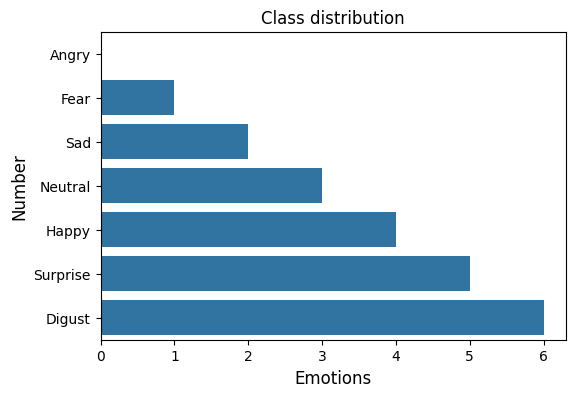

In [13]:
# Plotting a bar graph of the class distributions
plt.figure(figsize=(6,4))
sns.barplot(emotion_counts.emotion)
plt.title('Class distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Number of images per emotion')

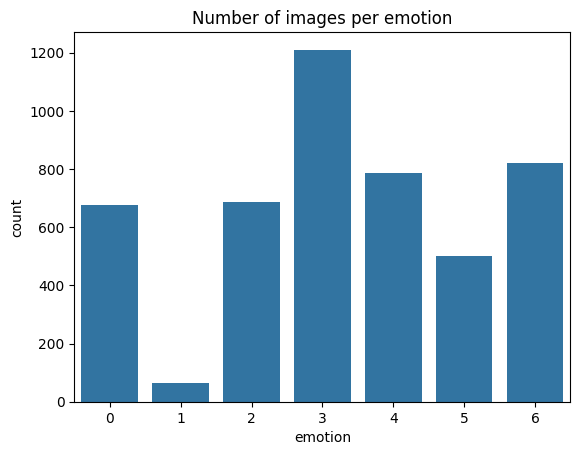

In [21]:
sns.barplot(x=df['emotion'].value_counts().index, y=df['emotion'].value_counts())
plt.title('Number of images per emotion')

Let's look at some images..

In [ ]:
df[' pixels'][0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [ ]:
img=df[' pixels'][920]

In [ ]:
img=np.array(img.split(' ')).reshape(48,48,1).astype('float32')

In [ ]:
img.shape

(48, 48, 1)

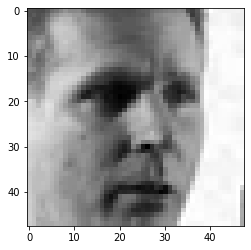

In [ ]:
plt.imshow(img.squeeze(),cmap='gray')

# Preprocessing

In [ ]:
images_list=np.zeros((len(df),48,48,1))

In [ ]:
images_list.shape

(35887, 48, 48, 1)

In [ ]:
images_label=pd.get_dummies(df['emotion'])

In [ ]:
images_label

,0,1,2,3,4,5,6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1
5,0,0,1,0,0,0,0
6,0,0,0,0,1,0,0
7,0,0,0,1,0,0,0
8,0,0,0,1,0,0,0
9,0,0,1,0,0,0,0


In [ ]:
for idx in range(len(df)):
    single_pic=np.array(df[' pixels'][idx].split(' ')).reshape(1,48,48,1).astype('float32')
    images_list[idx]=single_pic

In [ ]:
images_list.shape

(35887, 48, 48, 1)

In [ ]:
images_list[0].shape

(48, 48, 1)

In [ ]:
images_list[334].shape

(48, 48, 1)

In [ ]:
images_list[0]

array([[[ 70.],
        [ 80.],
        [ 82.],
        ...,
        [ 52.],
        [ 43.],
        [ 41.]],

       [[ 65.],
        [ 61.],
        [ 58.],
        ...,
        [ 56.],
        [ 52.],
        [ 44.]],

       [[ 50.],
        [ 43.],
        [ 54.],
        ...,
        [ 49.],
        [ 56.],
        [ 47.]],

       ...,

       [[ 91.],
        [ 65.],
        [ 42.],
        ...,
        [ 72.],
        [ 56.],
        [ 43.]],

       [[ 77.],
        [ 82.],
        [ 79.],
        ...,
        [105.],
        [ 70.],
        [ 46.]],

       [[ 77.],
        [ 72.],
        [ 84.],
        ...,
        [106.],
        [109.],
        [ 82.]]])

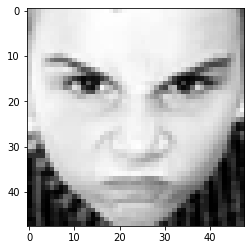

In [ ]:
plt.imshow(images_list[342].squeeze(),cmap='gray')

In [ ]:
df['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [ ]:
collections.Counter(np.array(df['emotion']))

Counter({0: 4953, 2: 5121, 4: 6077, 6: 6198, 3: 8989, 5: 4002, 1: 547})

# Splitting dataset to train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_Test, y_train, y_Test=train_test_split(images_list, images_label,test_size=0.20, shuffle=True)
X_val, X_Test, y_val, y_Test=train_test_split(X_Test, y_Test, test_size=0.5, shuffle= True)

In [ ]:
X_train.shape

(28709, 48, 48, 1)

In [ ]:
X_Test.shape

(3589, 48, 48, 1)

In [ ]:
X_val.shape

(3589, 48, 48, 1)

In [ ]:
X_train

array([[[[103.],
         [105.],
         [ 85.],
         ...,
         [246.],
         [242.],
         [245.]],

        [[120.],
         [118.],
         [105.],
         ...,
         [240.],
         [232.],
         [236.]],

        [[116.],
         [113.],
         [133.],
         ...,
         [237.],
         [237.],
         [234.]],

        ...,

        [[245.],
         [246.],
         [241.],
         ...,
         [236.],
         [237.],
         [246.]],

        [[247.],
         [248.],
         [246.],
         ...,
         [239.],
         [236.],
         [239.]],

        [[248.],
         [248.],
         [249.],
         ...,
         [240.],
         [238.],
         [238.]]],


       [[[209.],
         [211.],
         [213.],
         ...,
         [194.],
         [192.],
         [190.]],

        [[212.],
         [214.],
         [215.],
         ...,
         [197.],
         [193.],
         [192.]],

        [[214.],
         [215.],
      

# Normalizing

In [ ]:
X_train=X_train/255
X_val=X_val/255
X_Test=X_Test/255

In [ ]:
X_train

array([[[[0.40392157],
         [0.41176471],
         [0.33333333],
         ...,
         [0.96470588],
         [0.94901961],
         [0.96078431]],

        [[0.47058824],
         [0.4627451 ],
         [0.41176471],
         ...,
         [0.94117647],
         [0.90980392],
         [0.9254902 ]],

        [[0.45490196],
         [0.44313725],
         [0.52156863],
         ...,
         [0.92941176],
         [0.92941176],
         [0.91764706]],

        ...,

        [[0.96078431],
         [0.96470588],
         [0.94509804],
         ...,
         [0.9254902 ],
         [0.92941176],
         [0.96470588]],

        [[0.96862745],
         [0.97254902],
         [0.96470588],
         ...,
         [0.9372549 ],
         [0.9254902 ],
         [0.9372549 ]],

        [[0.97254902],
         [0.97254902],
         [0.97647059],
         ...,
         [0.94117647],
         [0.93333333],
         [0.93333333]]],


       [[[0.81960784],
         [0.82745098],
         [0.83

In [ ]:
!pip install keras==2.1.5

Applying data augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_std_normalization = False,
    zca_whitening= False,
    featurewise_std_normalization = True,
    rotation_range = 30,
    width_shift_range= 0.1,
    height_shift_range=0.1,
    zoom_range=0.2)


C:\ProgramData\Anaconda3\lib\site-packages\keras\preprocessing\image.py:526: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
datagen.fit(X_train)

In [ ]:
input_reshape=(48,48,1)
epochs=10
batch_size=128
hidden_num_units=256
output_num_units=7

In [ ]:
pool_size=(2,2)

# Building Model

In [ ]:
import tensorflow.keras as keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Convolution2D,Flatten, MaxPooling2D, Reshape, InputLayer
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
model=Sequential([
    Convolution2D(32, (3,3), activation='relu',input_shape=input_reshape),
    MaxPooling2D((2,2)),

    Convolution2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Convolution2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Convolution2D(64, (3,3), activation='relu'),

    Flatten(),

    Dense(64, 'relu'),

    Dense(7, 'softmax'),

])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_conv=model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/10
225/225 [==============================] - 104s 445ms/step - loss: 1.8253 - accuracy: 0.2490 - val_loss: 1.6317 - val_accuracy: 0.3622
Epoch 2/10
225/225 [==============================] - 103s 459ms/step - loss: 1.6033 - accuracy: 0.3768 - val_loss: 1.4803 - val_accuracy: 0.4299
Epoch 3/10
225/225 [==============================] - 104s 461ms/step - loss: 1.4694 - accuracy: 0.4376 - val_loss: 1.3772 - val_accuracy: 0.4770
Epoch 4/10
225/225 [==============================] - 104s 462ms/step - loss: 1.3724 - accuracy: 0.4758 - val_loss: 1.3077 - val_accuracy: 0.4968
Epoch 5/10
225/225 [==============================] - 99s 441ms/step - loss: 1.3004 - accuracy: 0.5047 - val_loss: 1.2854 - val_accuracy: 0.5065
Epoch 6/10
225/225 [==============================] - 105s 465ms/step - loss: 1.2522 - accuracy: 0.5201 - val_loss: 1.2531 - val_accuracy: 0.5149
Epoch 7/10
225/225 [==============================] - 102s 453ms/step - loss: 1.2063 - accuracy: 0.5436 - val_loss: 1.2804 - 

# Prediction

In [ ]:
model.predict_classes(X_train[345].reshape(1,48,48,1))

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2], dtype=int64)

In [ ]:
# 0 angry, 1 disgust, 2 fear, 3 happy, 4 sad, 5surprise, 6 neutral

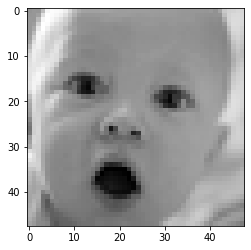

In [ ]:
plt.imshow(images_list[345].squeeze(),cmap='gray')